In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
def save_notebook():
    return display(Javascript("IPython.notebook.save_notebook()"),
                   include=['application/javascript'])

def output_HTML(read_file, output_file):
    from nbconvert import HTMLExporter
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file, 'w', encoding='utf-8').write(output)

In [4]:
import sys, os
sys.path.append('../')

from rankutils.mappings import ranking_type_map
from rankutils.cfgloader import cfgloader
from rankutils.evaluation import Evaluator
from rankutils.drawing import colors_from_cmap

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
sns.set()

import mpld3

In [5]:
pathcfg = cfgloader("/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/path_2.cfg")
evalcfgfile = "/home/alberto/phD/projects/performance_prediction/ret-mr-learning/source/evalcfg/eval_ICASSP_2019.cfg"
barfigsize=(20, 8)
linefigsize=(15, 15)
titleargs=dict(fontsize=10, horizontalalignment='center')

In [6]:
def draw(evaluator, meas_key, method_key='set', ax=None, textfmt="{0:0.3f}"):
    
    measure, idx, blim = evaluator.measure_map[meas_key]
    
    if not ax:
        ax = plt.gca()
    
    if method_key == 'set':
        mk = 'irp_evaluation'
    elif method_key == 'sample':
        mk = 'irp_evaluation_sample'
    else:
        raise ValueError("Invalid method key <{key:s}>. Choices are (\'set\', \'sample\')".format(method_key))

    # Enqueues the index of line plots to plot after plotting the bars
    line_queue = []

    data = evaluator.data
    xpos = 1
    
    handles = []
    labels = []

    for i, mdata in enumerate(data):

        val = mdata[mk][-1, idx]

        if mdata['params']['plot_type'] == 'bar':
            
            #print(mdata['name'], '->', mdata['drawargs']['color'])
            rect, = ax.bar(xpos, val, 0.9, 0, align='center', label=mdata['params']['label'] + "{0:1s}".format(''), 
                           color=mdata['drawargs']['color'], alpha=1.0)
            handles.append(rect)
            labels.append(mdata['params']['label'] + "{0:1s}".format(''))

            posx = rect.get_x()
            posy = rect.get_y()
            hgt = rect.get_height()
            wdt = rect.get_width()

            ax.text(posx + wdt/2, posy + hgt -0.05, textfmt.format(val), fontsize=15, bbox={'alpha': 0.0},
                     rotation=270, color='white', fontweight='bold', horizontalalignment='right')

            xpos += 1

        elif mdata['params']['plot_type'] == 'line':
            line_queue.append(i)

    rbound = xpos
    ax.set_xlim(left=0.0, right=rbound)

    # Lines are plotted after the xlimit is defined, which can only happen when all
    # bars are drawn
    for i in line_queue:

        mdata = data[i]
        val = mdata[mk][-1, idx]

        line, = ax.plot([0.0, rbound], [val, val], **mdata['drawargs'])
        handles.append(line)
        labels.append(mdata['params']['label'] + "{0:15s}".format(''))

        ax.text(0.02, val, "{0:0.3f}".format(val), fontsize=12, color=mdata['drawargs']['color'],
                horizontalalignment='left',  verticalalignment='bottom')

    ax.set_ylim(bottom=blim, top=1.0)
    ax.set_ylabel(meas_key)
    
    ax.set_xlabel('Method')
    ax.set_xticks([])

    # Rect Legend
    plt.legend(handles, labels, loc='lower center', bbox_to_anchor=[1.0, 0], fancybox=True, shadow=True)
    
    return

In [7]:
def drawh(evaluator, meas_key, method_key='set', ax=None, textfmt="{0:0.3f}", order=-1):
    
    measure, idx, blim = evaluator.measure_map[meas_key]
    
    gettc = lambda v: 'black' if np.linalg.norm(v[0:3]) >= 0.8 else 'white'
    
    if not ax:
        ax = plt.gca()
    
    if method_key == 'set':
        mk = 'irp_evaluation'
    elif method_key == 'sample':
        mk = 'irp_evaluation_sample'
    else:
        raise ValueError("Invalid method key <{key:s}>. Choices are (\'set\', \'sample\')".format(method_key))

    # Enqueues the index of line plots to plot after plotting the bars
    line_queue = []

    data = evaluator.data
    xpos = 1
    
    handles = []
    labels = []

    for i, mdata in enumerate(data):

        val = mdata[mk][-1, idx]

        if mdata['params']['plot_type'] == 'bar':
            
            #print(mdata['name'], '->', mdata['drawargs']['color'])
            rect, = ax.barh(xpos, val, 0.9, 0, align='center', label=mdata['params']['label'] + "{0:1s}".format(''), 
                           color=mdata['drawargs']['color'], alpha=0.4)
            handles.append(rect)
            labels.append(mdata['params']['label'] + "{0:1s}".format(''))

            posx = rect.get_x()
            posy = rect.get_y()
            hgt = rect.get_height()
            wdt = rect.get_width()

            ax.text(posx, posy+hgt/2, textfmt.format(val), fontsize=12, bbox={'alpha': 0.0}, 
                    color='black', fontweight='bold', horizontalalignment='left',
                    verticalalignment='center')

            xpos += 1

        elif mdata['params']['plot_type'] == 'line':
            line_queue.append(i)

    rbound = xpos
    ax.set_ylim(bottom=0.0, top=rbound)

    # Lines are plotted after the xlimit is defined, which can only happen when all
    # bars are drawn
    for i in line_queue:

        mdata = data[i]
        val = mdata[mk][-1, idx]

        line, = ax.plot([0.0, rbound], [val, val], **mdata['drawargs'])
        handles.append(line)
        labels.append(mdata['params']['label'] + "{0:15s}".format(''))

        ax.text(0.02, val, "{0:0.3f}".format(val), fontsize=12, color=mdata['drawargs']['color'],
                horizontalalignment='left',  verticalalignment='top')

    ax.set_xlim(left=blim, right=1.0)
    
    if order==-1 or order>=6:
        ax.set_xlabel(meas_key)
    
    #ax.set_ylabel('Method')
    ax.set_ylim(0.5, len(labels)+0.5)
    ax.set_yticks(np.arange(1, len(labels)+1))
    ax.set_yticklabels(l.split('-')[0] for l in labels)
    ax.invert_yaxis()

    # Rect Legend
    #plt.legend(handles, labels, loc='lower right', bbox_to_anchor=[1.0, 0], fancybox=True, shadow=True)
    
    return

In [8]:
def draw_pos_eval(evaluator, ax=None, measure='NACC', order=-1):
            
    if not ax:
        ax = plt.gca()
        
    if measure == 'NACC':
        mkey = 'pos_evaluation_nacc'
    elif measure == 'F-Score':
        mkey = 'pos_evaluation_f1'
    else:
        raise ValueError('Invalid measure keyword -- options are <NACC> and <F-Score>')
        
    data = evaluator.data
    
    handles = []
    labels = []
    
    for i, mdata in enumerate(data):
        
        y = mdata[mkey][-1]
        x = np.arange(1, y.size+1).astype(np.int32)
        
        line, = ax.plot(x, y, fillstyle='full', alpha=1.0, **mdata['drawargs'])
        
        handles.append(line)
        labels.append(mdata['params']['label'])
        
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_yticks([y for y in np.arange(0.0, 1.1, 0.2)])
    ax.set_yticklabels(["{0:0.1f}".format(y) for y in np.arange(0.0, 1.1, 0.2)], fontdict=dict(fontsize=12))
    if order == -1 or (order % 3) == 0:
        ax.set_ylabel(measure, fontdict=dict(fontsize=12))

    ax.set_xlim(left=1.0, right=10.0)
    ax.set_xticks([x for x in np.arange(1, 11, 1)])
    ax.set_xticklabels(["{0:d}".format(x) for x in np.arange(1, 11, 1)], fontdict=dict(fontsize=8))
    if order == -1 or order >= 6:
        ax.set_xlabel("Rank Position", fontdict=dict(fontsize=10))


    # Line Legend
    fig = plt.gcf()

    ax.grid(True, which='both')
    
    return handles, labels

In [9]:
from tqdm import tqdm
#prov = ['vggfaces_001', 'vggfaces_002', 'vggfaces_003']
keys = ['vggfaces_001', 'vggfaces_002', 'vggfaces_003', 'places365_001', 'places365_003', 'places365_002',
        'imagenet_001', 'imagenet_004', 'imagenet_003']

evaluators = dict()
aliases = dict(places365_001='P365 VGG16-L2Sq', places365_002='P365 R152-L2Sq',
               places365_003='P365 VGG16-Cos', vggfaces_001='VGGF VGG16-L2Sq',
               vggfaces_002='VGGF VGG16-L2Sq + Pert', vggfaces_003='VGGF VGG16-Cos',
               imagenet_001='INET Rv2-L2Sq', imagenet_004='INET Rv2-Canb',
               imagenet_003='INET Rv2-Cheb')

for i in tqdm(range(len(keys)), desc='Evaluating ', total=len(keys)):
    k = keys[i]
    evaluators[k] = Evaluator(evalcfgfile=evalcfgfile, key=k, pathcfg=pathcfg)
    evaluators[k].evaluate()

Evaluating : 100%|██████████| 9/9 [00:24<00:00,  2.22s/it]


# Positional nACC

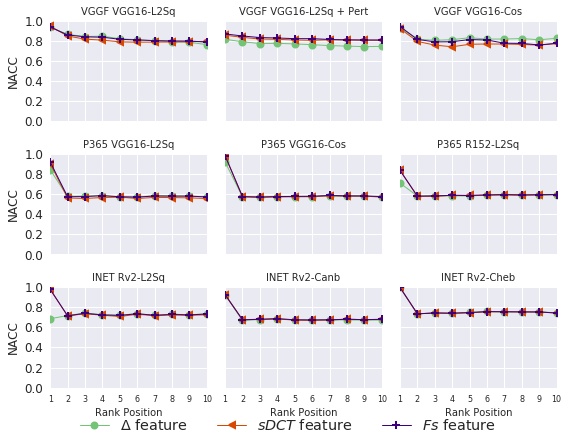

In [10]:
fig, axes = plt.subplots(3, 3, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((8, 6))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    
    
    
    h, l = draw_pos_eval(evaluators[key], ax=axes[i], measure = 'NACC', order=i)
    
    if i == len(keys)-1:
        fig.legend(h, l, fancybox=True, shadow=True, loc='lower center', bbox_to_anchor=[0.5, -0.02], ncol=3,
                  fontsize='x-large')

fig.tight_layout()
plt.savefig('/home/alberto/Dropbox/ICASSP-2019_ML_Relevance_Prediction/tex/figures/ICASSP_2019_Pos-NACC.svg')

# Positional F1-Score

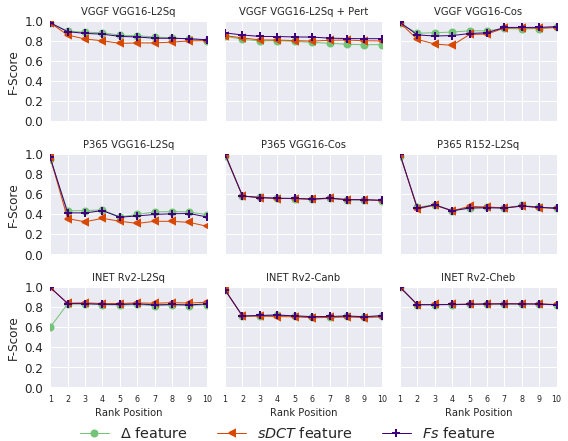

In [11]:
fig, axes = plt.subplots(3, 3, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((8, 6))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)

    h, l = draw_pos_eval(evaluators[key], ax=axes[i], measure = 'F-Score', order=i)
    
    if i == len(keys)-1:
        fig.legend(h, l, fancybox=True, shadow=True, loc='lower center', bbox_to_anchor=[0.5, -0.03], ncol=3,
                  fontsize='x-large')

fig.tight_layout()
plt.savefig('/home/alberto/Dropbox/ICASSP-2019_ML_Relevance_Prediction/tex/figures/ICASSP_2019_Pos-Fscore.svg')

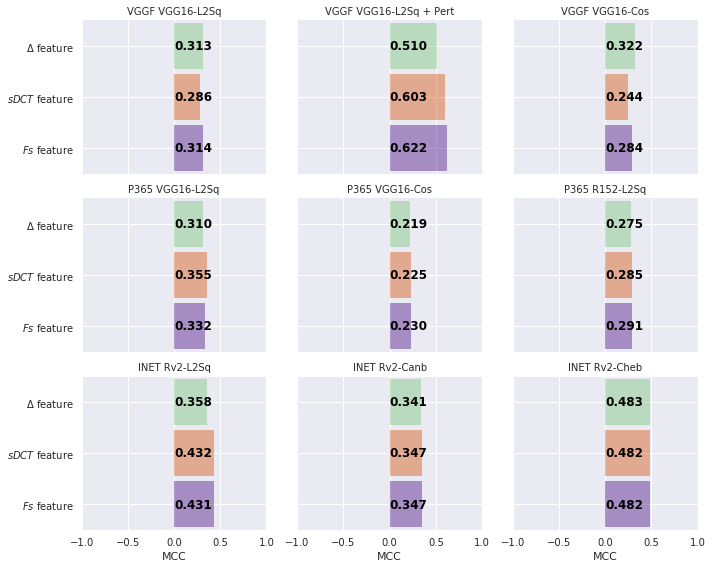

In [12]:
fig, axes = plt.subplots(3, 3, sharey=True, sharex=True)
axes = axes.reshape(-1)
fig.set_size_inches((10, 8))

for i, key in enumerate(keys):
    axes[i].set_title("{0:s}".format(aliases[key]),
                      fontdict=titleargs)
    drawh(evaluators[key], 'MCC', ax=axes[i], order=i)
    
fig.tight_layout()